### Projeto - Técnicas de Programação I Python - Ada Tech / Santander Coders 2023
Alunos: Bruno Henrique / Natália Brito / Jheiniffer Mendes / Fernanda Dallaqua / Vinícius D'Lucas
 
Turma 1006 - Prof. Jorge Cristhian Chamby Dias

# Área de Dados

A melhoria do processamento dos computadores, o surgimento de tecnologias como computação em nuvem, machine e a possibilidade da coleta de dados de diversos equipamentos através da Internet das Coisas (_Internet of Things_, _IoT_) fez com que uma enorme quantidade de dados (_Big Data_) começasse a ser produzido.

Esses dados, quando refinados, analisados e interpretados, podem trazer poderosas descobertas que melhoram as tomadas de decisão, ajudando a construir estratégias de mercado/negócios e a diminuir custos.

Existem diversas possibilidades de atuação na área, como por exemplo, na coleta e limpeza dos dados, análises exploratórias desses dados, construção e implantação de modelos de aprendizado de máquina (_machine learning_), e interpretação dos resultados desses modelos.

Os profissionais da área de dados podem ser divididos nas seguintes profissões:
- Engenheiro de dados: responsável pela coleta e limpeza dos dados
- Analista de dados: pode realizar limpeza dos dados e também é responsável pela análise exploratória desses dados
- Engenheiro de _machine learning_: constrói e implanta os modelos
- Cientista de dados: pode realizar qualquer uma dessas etapas

Neste estudo analisaremos os dados coletados na pesquisa [State of Data Brazil](https://www.stateofdata.com.br/) do ano de 2022, que fornece um panorama sobre o mercado de trabalho na área de dados no Brasil. Essa pesquisa foi realizada pela **Data Hackers** e a **Bain & Company**, no período de 10 de outubro a 28 de novembro de 2022. O arquivo .csv com as respostas dos 4.271 participantes pode ser obtido na plataforma [Kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-2022).

# State of Data Brazil 2022

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import re

ModuleNotFoundError: No module named 'geopandas'

In [195]:
df = pd.read_csv('State_of_data_2022.csv', sep = ',')
df.drop("('P0', 'id')", axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 352 entries, ('P1_a ', 'Idade') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(67)
memory usage: 11.4+ MB


A pesquisa é dividida em 8 partes, totalizando 352 colunas (contando com a coluna de id, identificada como P0):

Parte 1 - Dados demográfico
Parte 2 - Dados sobre carreira
Parte 3 - Desafios dos gestores de times de dados
Parte 4 - Conhecimentos na área de dados
Parte 5 - Objetivos na área de dados
Parte 6 - Conhecimentos em Engenharia de Dados/DE
Parte 7 - Conhecimentos em Análise de Dados/DA
Parte 8 - Conhecimentos em Ciências de Dados/DS

Algumas perguntas podem ter respostas multi-valoradas, então ocupando mais de uma coluna no dataset. Dessa forma, cada coluna é identificada como uma tupla (Pergunta,Alternativa escolhida), e as perguntas são divididas em Parte, Letra da pergunta e Número da opção escolhida:

    P3_a_1 = Parte 3, pergunta (a), opção (1)

A fim de garantir o anonimato dos respondentes, os realizadores da pesquisa retiraram respostas que possam mostrar outliers e que fariam ser possível o reconhecimento de quem respondeu.

A seguir são mostradas as perguntas mais gerais para cada parte do questionário.

In [196]:
# Separando por partes
df_parte_1 = df.filter(like = 'P1', axis = 1)
df_parte_2 = df.filter(like = 'P2', axis = 1)
df_parte_3 = df.filter(like = 'P3', axis = 1)
df_parte_4 = df.filter(like = 'P4', axis = 1)
df_parte_5 = df.filter(like = 'P5', axis = 1)
df_parte_6 = df.filter(like = 'P6', axis = 1)
df_parte_7 = df.filter(like = 'P7', axis = 1)
df_parte_8 = df.filter(like = 'P8', axis = 1)

In [197]:
def get_perguntas(df_parte: pd.DataFrame,parte:int) -> None:
    columns   = list(df_parte.columns)
    print(f'Parte {parte} - Total de colunas: {len(columns)}')
    count = 0
    for c in columns:
        aux            = c.split('(')[1].split(')')[0]
        identificador1 = aux.split(',')[0]
        if len(identificador1.split('_')) <= 2:
            print(aux)
            count += 1
    print(f'Total de perguntas gerais: {count}')

In [198]:
get_perguntas(df_parte_1,1)

Parte 1 - Total de colunas: 15
'P1_a ', 'Idade'
'P1_b ', 'Genero'
'P1_c ', 'Cor/raca/etnia'
'P1_d ', 'PCD'
'P1_e ', 'experiencia_profissional_prejudicada'
'P1_f ', 'aspectos_prejudicados'
'P1_g ', 'vive_no_brasil'
'P1_i ', 'Estado onde mora'
'P1_j ', 'Mudou de Estado?'
'P1_k ', 'Regiao de origem'
'P1_l ', 'Nivel de Ensino'
'P1_m ', 'Área de Formação'
Total de perguntas gerais: 12


In [199]:
get_perguntas(df_parte_2,2)

Parte 2 - Total de colunas: 36
'P2_a ', 'Qual sua situação atual de trabalho?'
'P2_b ', 'Setor'
'P2_c ', 'Numero de Funcionarios'
'P2_d ', 'Gestor?'
'P2_e ', 'Cargo como Gestor'
'P2_f ', 'Cargo Atual'
'P2_g ', 'Nivel'
'P2_h ', 'Faixa salarial'
'P2_i ', 'Quanto tempo de experiência na área de dados você tem?'
'P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'
'P2_k ', 'Você está satisfeito na sua empresa atual?'
'P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?'
'P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?'
'P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?'
'P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?'
'P2_p ', 'Atualmente qual a sua forma de trabalho?'
'P2_q ', 'Qual a forma de trabalho ideal para você?'
'P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua

In [200]:
get_perguntas(df_parte_3,3)

Parte 3 - Total de colunas: 38
'P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'
'P3_b ', 'Quais desses papéis/cargos fazem parte do time 
'P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?'
'P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?'
Total de perguntas gerais: 4


In [201]:
get_perguntas(df_parte_4,4)

Parte 4 - Total de colunas: 100
'P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
'P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?'
'P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?'
'P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'
'P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'
'P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?'
'P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?'
'P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?'
'P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?'
'P4_i ', 'Microsoft PowerBI'
Total de perguntas gerais: 10


In [202]:
get_perguntas(df_parte_5,5)

Parte 5 - Total de colunas: 4
'P5_a ', 'Qual seu objetivo na área de dados?'
'P5_b ', 'Qual oportunidade você está buscando?'
'P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'
'P5_d ', 'Como tem sido a busca por um emprego na área de dados?'
Total de perguntas gerais: 4


In [203]:
get_perguntas(df_parte_6,6)

Parte 6 - Total de colunas: 59
'P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?'
'P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?'
'P6_c ', 'Sua organização possui um Data Lake?'
'P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?'
'P6_e ', 'Sua organização possui um Data Warehouse?'
'P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?'
'P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?'
'P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?'
Total de perguntas gerais: 8


In [204]:
get_perguntas(df_parte_7,7)

Parte 7 - Total de colunas: 50
'P7_1 ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?'
'P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?'
'P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?'
'P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?'
Total de perguntas gerais: 4


In [205]:
get_perguntas(df_parte_8,8)

Parte 8 - Total de colunas: 50
'P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?'
'P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?'
'P8_3 ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?'
'P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?'
Total de perguntas gerais: 4


E a seguir é mostrada a contagem dos tipos de dados para cada parte do questionário

In [206]:
def get_tipos(df_parte: pd.DataFrame,parte:str) -> pd.DataFrame:
    tipos    = df_parte.dtypes.values.tolist()
    df_tipos = pd.DataFrame(tipos,columns=[parte])
    df_aggr  = df_tipos.groupby([parte])[parte].count()
    return df_aggr

def get_df_tipos() -> pd.DataFrame:
    dict_columns = {x: f'P{x+1}' for x in range(8)}
    dfs_tipos = []
    dfs_tipos.append(get_tipos(df_parte_1,'P1'))
    dfs_tipos.append(get_tipos(df_parte_2,'P2'))
    dfs_tipos.append(get_tipos(df_parte_3,'P3'))
    dfs_tipos.append(get_tipos(df_parte_4,'P4'))
    dfs_tipos.append(get_tipos(df_parte_5,'P5'))
    dfs_tipos.append(get_tipos(df_parte_6,'P6'))
    dfs_tipos.append(get_tipos(df_parte_7,'P7'))
    dfs_tipos.append(get_tipos(df_parte_8,'P8'))
    df_tipos = pd.concat(dfs_tipos,axis=1,ignore_index=True)
    df_tipos.rename(columns=dict_columns,inplace=True)
    df_tipos = df_tipos.fillna(0)
    df_tipos = df_tipos.astype('int32',errors='ignore')
    df_tipos['Total'] = df_tipos.loc[df_tipos.index].sum(axis=1)
    return df_tipos

In [207]:
df_tipos = get_df_tipos()
display(df_tipos)

,P1,P2,P3,P4,P5,P6,P7,P8,Total
bool,1,0,0,0,0,0,0,0,1
float64,1,17,34,89,0,51,46,46,284
object,13,19,4,11,4,8,4,4,67


# Estatísticas gerais da idade dos profissionais

A coluna ('P1_a ', 'Idade') é a única do dataset que possui valores contínuos. As outras colunas de tipo float64 apenas indicam se o respondente escolheu uma dada opção de resposta (1 se escolheu a resposta e 0 para se não a escolheu).

Tirando algumas estatísticas básicas temos que a idade digitada pelos respondentes varia de 18 a 54 anos, com média de 31 anos e mediana de 30 anos.



,Idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


Text(0, 0.5, 'Idade')

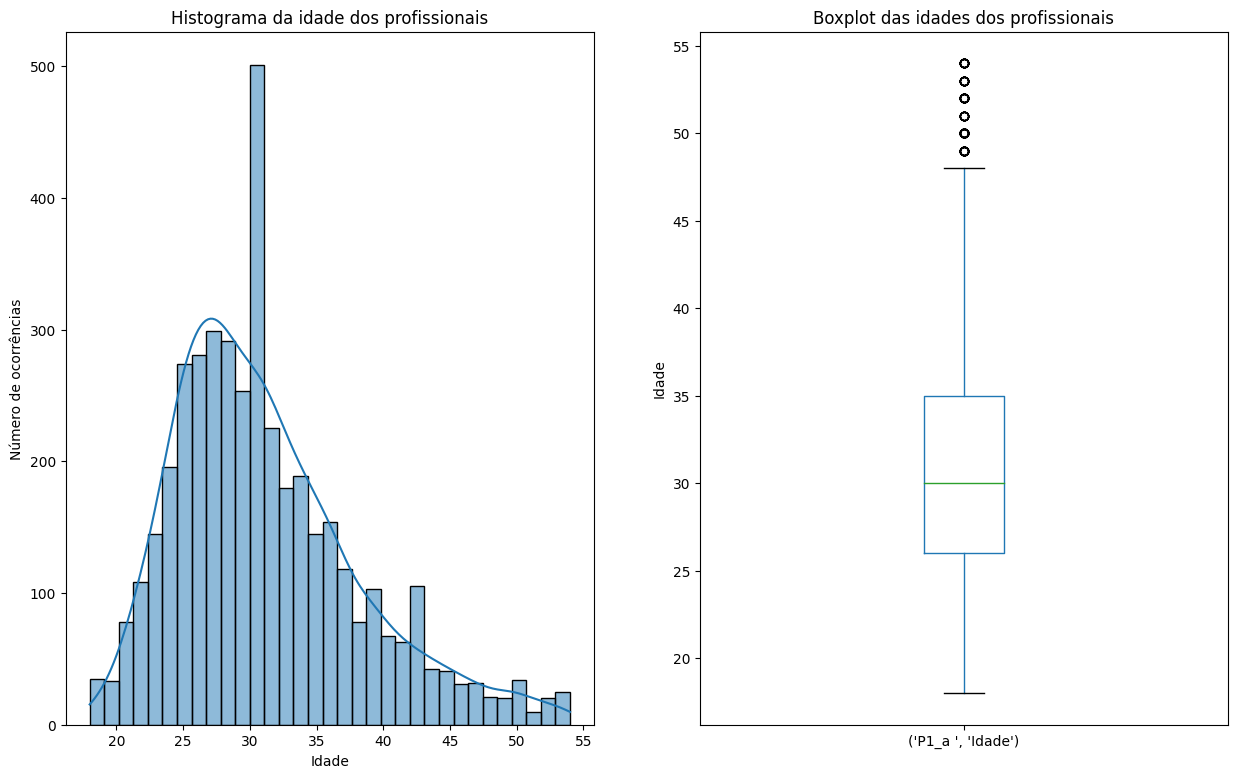

In [208]:
df_idade = pd.DataFrame(df_parte_1["('P1_a ', 'Idade')"].describe())
df_idade.rename(columns={"('P1_a ', 'Idade')": "Idade"}, inplace=True)
display(df_idade)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

sns.histplot(data=df_parte_1, x="('P1_a ', 'Idade')",ax=ax[0], kde=True);
ax[0].set_title('Histograma da idade dos profissionais')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Número de ocorrências')

df_parte_1.boxplot(column=["('P1_a ', 'Idade')"], ax=ax[1], grid=False)
ax[1].set_title('Boxplot das idades dos profissionais')
ax[1].set_ylabel('Idade')

Text(0.5, 1.0, 'Profissionais por idade')

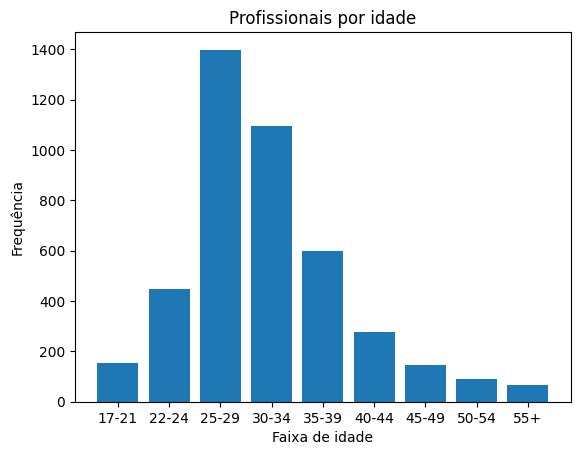

In [209]:
# por faixa de idade
ax = plt.bar(data = df_parte_1, x = df_parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().index,
        height = df_parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().values)
plt.xlabel('Faixa de idade')
plt.ylabel('Frequência')
plt.title('Profissionais por idade')

A maioria dos profissionais concentra-se na faixa etária de 25 a 34 anos.

# Distribuição das idades dos profissionais por gênero e nível de carreira

([<matplotlib.patches.Wedge at 0x1fc5aeaca50>,
 [Text(0.7832451088357187, 0.772351668273542, 'Feminino'),
  Text(-0.7900461291343092, -0.765393437285619, 'Masculino'),
  Text(1.0999569679494896, -0.009729782082127532, 'Não informado')],
 [Text(0.4272246048194829, 0.42128272814920464, '24.8%'),
  Text(-0.4309342522550777, -0.4174873294285194, '74.9%'),
  Text(0.5999765279724488, -0.005307153862978653, '0.3%')])

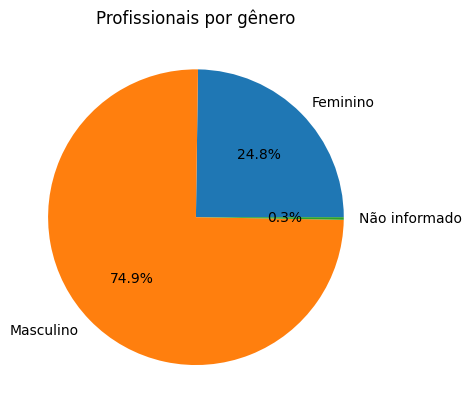

In [210]:
genero = df_parte_1.groupby("('P1_b ', 'Genero')")["('P1_b ', 'Genero')"].count()
labels = 'Feminino', 'Masculino',  'Não informado'
plt.title('Profissionais por gênero')
plt.pie(genero, labels = labels, autopct='%1.1f%%')

Ao examinarmos o perfil dos profissionais na área de Dados, observamos uma significativa disparidade: cerca de 75% são homens, 24.8% são mulheres, e uma proporção ainda menor não especificou o gênero. Esse padrão se estende para as outras áreas de TI, onde, segundo a Pesquisa Nacional por Amostra de Domicílios (PNAD) apenas 20% dos profissionais de TI são mulheres.

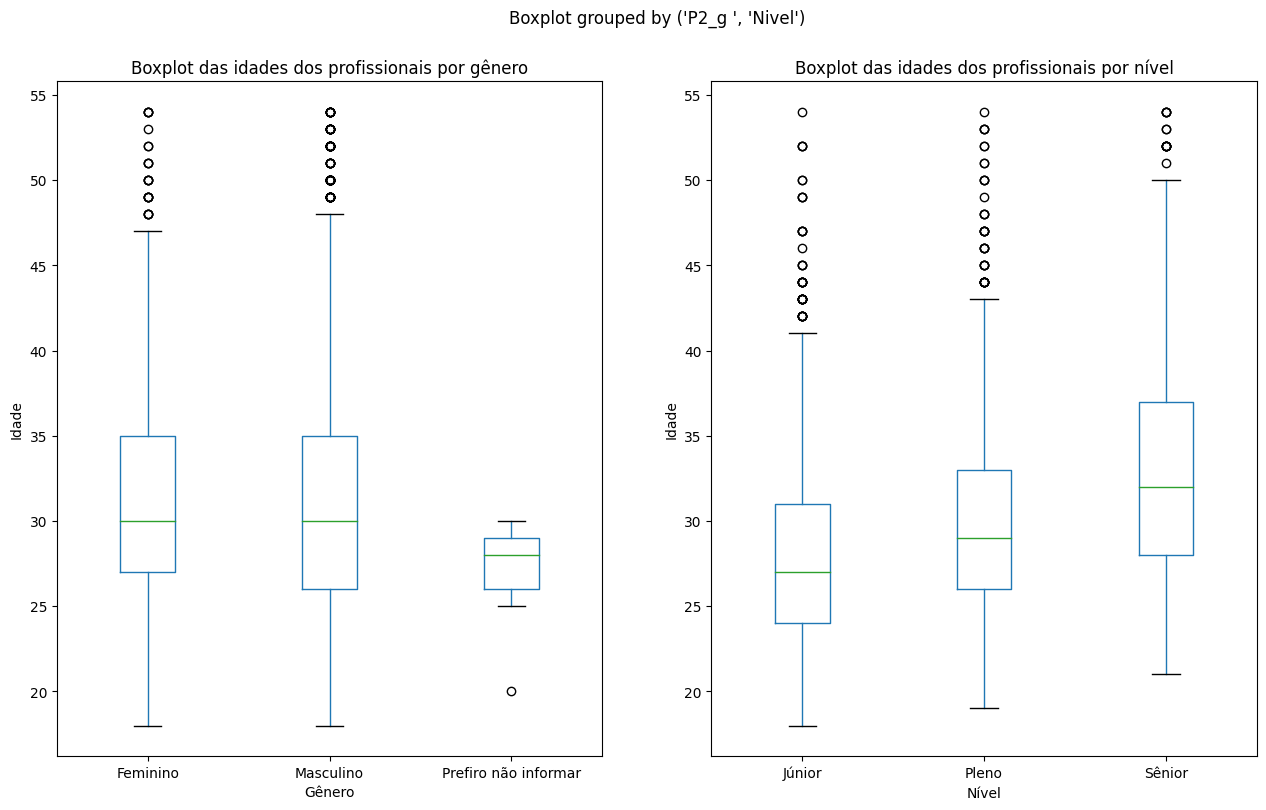

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
df_parte_1.boxplot(column=["('P1_a ', 'Idade')"], by="('P1_b ', 'Genero')", ax=ax[0], grid=False);
ax[0].set_title('Boxplot das idades dos profissionais por gênero')
ax[0].set_ylabel('Idade')
ax[0].set_xlabel('Gênero')

df.boxplot(column=["('P1_a ', 'Idade')"], by="('P2_g ', 'Nivel')", ax=ax[1], grid=False);
ax[1].set_title('Boxplot das idades dos profissionais por nível')
ax[1].set_ylabel('Idade')
ax[1].set_xlabel('Nível');

# Escolaridade

Text(0.5, 1.0, 'Profissionais por escolaridade')

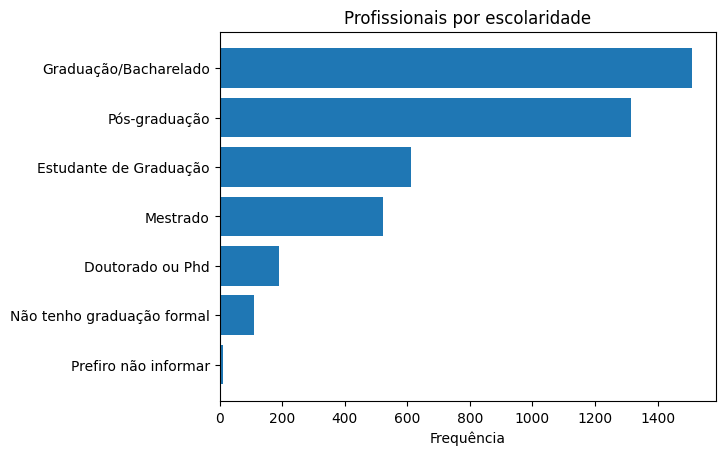

In [212]:
index = df_parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).index
values = df_parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por escolaridade')

Os profissionais apresentam um elevado nível de educação formal, abrangendo graduação e pós-graduação.

# Número de profissionais por Estado e Região do Brasil

In [213]:
num_profissionais_nao_moram_brasil = df_parte_1[df_parte_1["('P1_g ', 'vive_no_brasil')"]==False].shape[0]
mascara_sem_estado                 = (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull()) & (df_parte_1["('P1_g ', 'vive_no_brasil')"]==True)
num_profissionais_nao_responderam  = df_parte_1[mascara_sem_estado].shape[0]

print(f'Número de profissionais que não moram no Brasil: {num_profissionais_nao_moram_brasil}')
print(f'Número de profissionais que não tem Estado: {num_profissionais_nao_responderam}')

Número de profissionais que não moram no Brasil: 100
Número de profissionais que não tem Estado: 15


In [214]:
df_profissionais_por_estado2 = df_parte_1.groupby("('P1_i_1 ', 'uf onde mora')")["('P1_i_1 ', 'uf onde mora')"].count().sort_values().to_frame()
df_profissionais_por_estado2.rename(columns={"('P1_i_1 ', 'uf onde mora')": "Contagem"},inplace=True)
df_profissionais_por_estado2.reset_index(inplace=True)

In [215]:
shp_brasil = 'BR_UF_2022/BR_UF_2022.shp'
gdf        = gpd.read_file(shp_brasil)
merged_df  = pd.merge(left=gdf,right=df_profissionais_por_estado2,
                     how='left', left_on='SIGLA_UF', right_on="('P1_i_1 ', 'uf onde mora')")
merged_df.fillna(0,inplace=True)


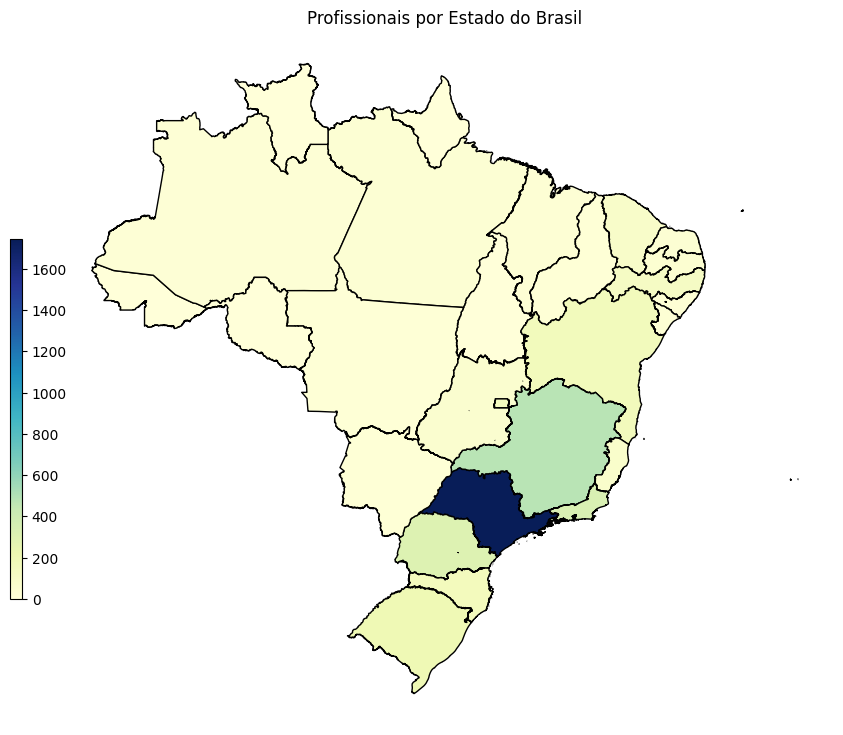

In [216]:
coluna = "Contagem"
vmin = merged_df[coluna].min()
vmax = merged_df[coluna].max()
cmap = 'YlGnBu'
fig,ax = plt.subplots(1,figsize=(12,9))
ax.axis('off')
merged_df.plot(column=coluna, ax=ax, edgecolor='black', linewidth=1, cmap=cmap)
ax.set_title('Profissionais por Estado do Brasil')
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),
                           cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15,0.25,0.01,0.4])
cbar   = fig.colorbar(sm, cax=cbaxes)

In [217]:
df_profissionais_regiao2 = df_parte_1.groupby("('P1_i_2 ', 'Regiao onde mora')")["('P1_i_2 ', 'Regiao onde mora')"].count().sort_values().to_frame()
df_profissionais_regiao2.rename(columns={"('P1_i_2 ', 'Regiao onde mora')":"Contagem"},inplace=True)
df_profissionais_regiao2.reset_index(inplace=True)
gdf_regioes              = gdf.dissolve(by='NM_REGIAO').reset_index()
regioes                  = gdf_regioes['NM_REGIAO']
regioes                  = [x.split('\n')[0] for x in regioes]
gdf_regioes['NM_REGIAO'] = regioes
merged_df_regioes        = pd.merge(left=gdf_regioes,right=df_profissionais_regiao2, 
                              how='left', left_on='NM_REGIAO', right_on="('P1_i_2 ', 'Regiao onde mora')")
merged_df_regioes.fillna(0,inplace=True)

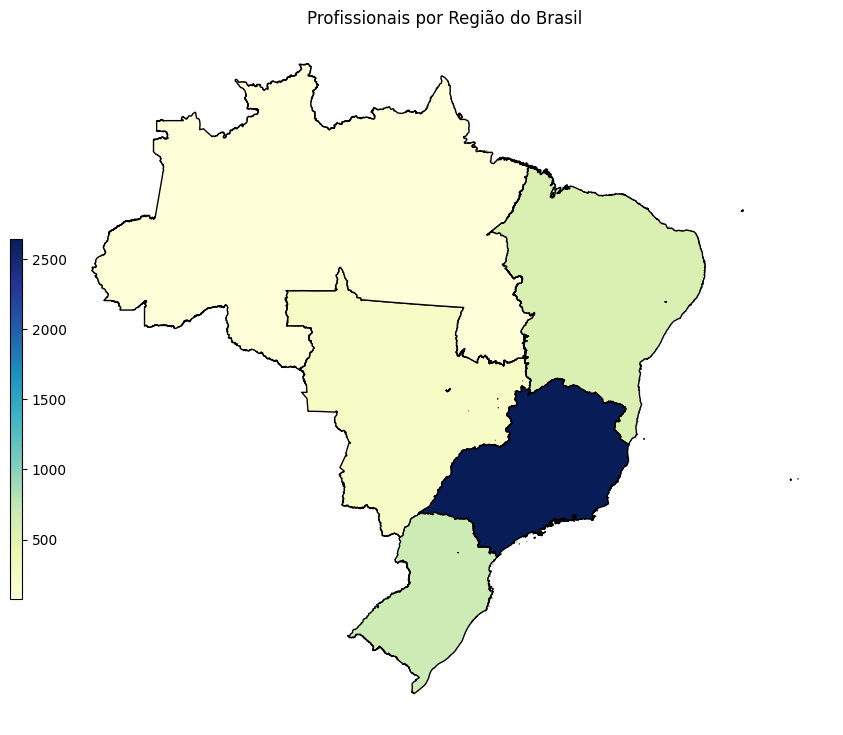

In [218]:
coluna = "Contagem"
vmin = merged_df_regioes[coluna].min() 
vmax = merged_df_regioes[coluna].max() 
cmap = 'YlGnBu'
fig,ax = plt.subplots(1,figsize=(12,9))
ax.axis('off')
merged_df_regioes.plot(column=coluna, ax=ax, edgecolor='black', linewidth=1, cmap=cmap)
ax.set_title('Profissionais por Região do Brasil')
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), 
                           cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15,0.25,0.01,0.4])
cbar   = fig.colorbar(sm, cax=cbaxes)

In [219]:
df_profissionais_por_estado = df_parte_1.groupby("('P1_i ', 'Estado onde mora')")["('P1_i ', 'Estado onde mora')"].count().sort_values()
df_profissionais_regiao    = df_parte_1.groupby("('P1_i_2 ', 'Regiao onde mora')")["('P1_i_2 ', 'Regiao onde mora')"].count().sort_values()

num_prof_AM                = df_profissionais_por_estado['Amazonas (AM)']
num_prof_PA                = df_profissionais_por_estado['Pará (PA)']
mascara_prof_norte_sem_est = (df_parte_1["('P1_i_2 ', 'Regiao onde mora')"] == 'Norte') & (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull())
num_prof_norte_sem_estado  = df_parte_1[mascara_prof_norte_sem_est].shape[0]


print(f'Número de profissionais no Norte: {df_profissionais_regiao["Norte"]}')
print(f'Número de profissionais no Amazonas: {num_prof_AM}')
print(f'Número de profissionais no Pará: {num_prof_PA}')
print(f'Número de profissionais no Norte mas sem Estado: {num_prof_norte_sem_estado}')

Número de profissionais no Norte: 76
Número de profissionais no Amazonas: 26
Número de profissionais no Pará: 35
Número de profissionais no Norte mas sem Estado: 15


O Estado de São Paulo possui a grande maioria de profissionais e outros dois Estados do Sudeste, Minas Gerais e Rio de Janeiro, ficam com o 2º e 3º lugares, explicando a região Sudeste como a que mais tem profissionais de dados no Brasil. Os Estados do Acre, Amapá, Roraima, Tocantins (Norte) e Mato Grosso (Centro-Oeste) não tiveram profissionais.

Porém, ao filtrar quais profissionais são da região Norte mas não possuem resposta em Estado, obtemos a quantidade de 15, que é exatamente a quantidade que encontramos anteriormente de profissionais que não tem Estado.


# Número de profissionais por Estado e Região do Brasil separados pelo gênero

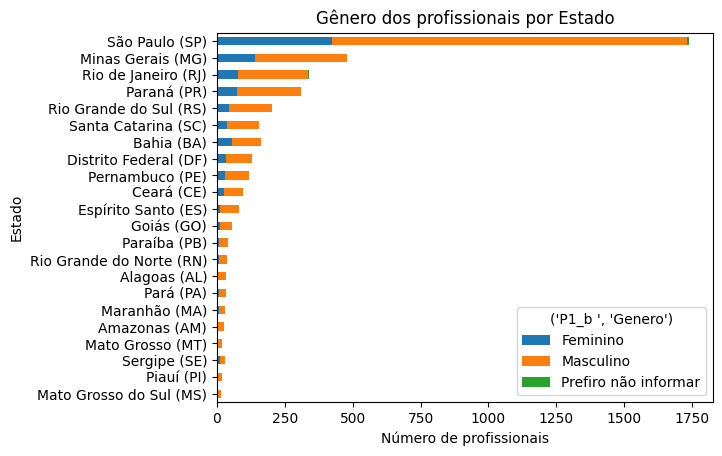

In [220]:
coluna_genero = "('P1_b ', 'Genero')"
coluna_estado = "('P1_i ', 'Estado onde mora')"
df_genero_por_estado = df_parte_1.groupby([coluna_estado,coluna_genero]).size()
df_genero_por_estado.unstack().sort_values('Masculino').plot(kind='barh',stacked=True, ylabel= 'Estado', xlabel="Número de profissionais",
                                    title='Gênero dos profissionais por Estado');

In [221]:
def tipo_profissionais_por_regiao(df_parte: pd.DataFrame, tipo: str, coluna_tipo: str, campo_sort: str) -> None:
    coluna_regiao      = "('P1_i_2 ', 'Regiao onde mora')"
    df_tipo_por_regiao = df_parte_1.groupby([coluna_regiao,coluna_tipo]).size().unstack().sort_values(campo_sort)
    df_tipo_por_regiao.plot(kind='barh',stacked=True, ylabel= 'Região', xlabel="Número de profissionais",
                                    title=f'{tipo} por Região')
    return df_tipo_por_regiao

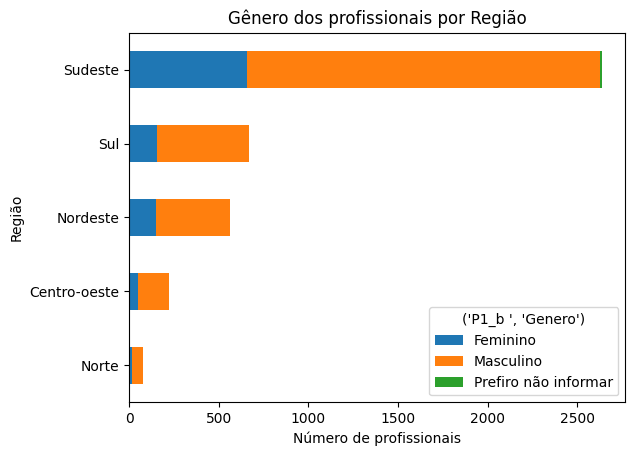

In [222]:
_ = tipo_profissionais_por_regiao(df_parte_1, 'Gênero dos profissionais', "('P1_b ', 'Genero')", 'Masculino')

Em relação ao gênero, como visto anteriormente, temos uma alta predominância do gênero Masculino, o que também é visto para todos os Estados do Brasil.

Dividindo o gênero por regiões, podemos confirmar um maior número de profissionais do gênero Feminino no Estado do Sudeste, o que é explicado no gráfico por Estado, com SP, MG, RJ tendo a maior quantidade de profissionais desse gênero.


# Cor/raça/etnia

Text(0.5, 1.0, 'Profissionais por cor/raça/etnia')

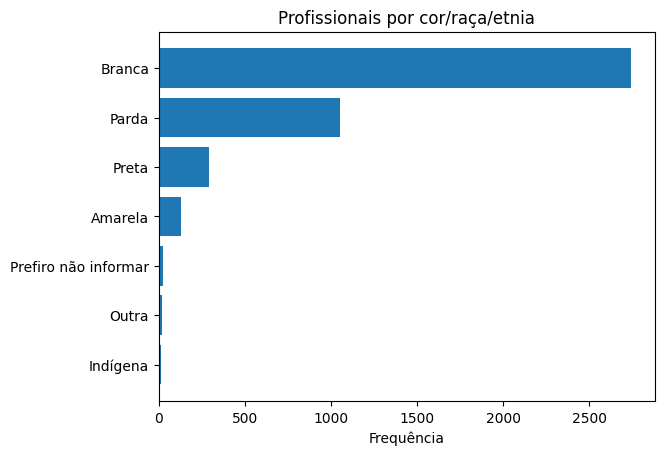

In [223]:
index = df_parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).index
values = df_parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por cor/raça/etnia')

A análise dos dados coletados pela pesquisa revela uma clara predominância de profissionais que se autodeclaram como brancos. Essa tendência levanta questões sobre a diversidade e inclusão na área de dados, destacando a necessidade de esforços para tornar o campo mais representativo de diferentes grupos étnicos.

# Número de profissionais por Estado e Região do Brasil separados por Cor/raça/etnia

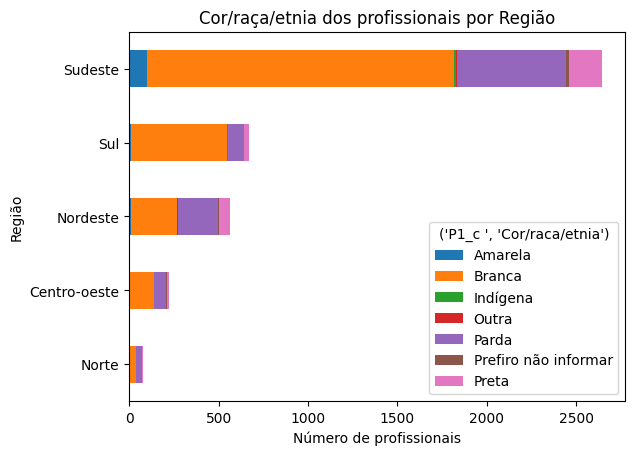

In [224]:
df_etnia = tipo_profissionais_por_regiao(df_parte_1, 'Cor/raça/etnia dos profissionais', "('P1_c ', 'Cor/raca/etnia')", 'Branca')


In [225]:
df_etnia.fillna(0,inplace=True)
total_etnia_regiao   = df_etnia.sum(axis=1)
df_etnia_porcentagem = df_etnia.divide(total_etnia_regiao,axis=0) * 100
display(df_etnia_porcentagem)

"('P1_c ', 'Cor/raca/etnia')",Amarela,Branca,Indígena,Outra,Parda,Prefiro não informar,Preta
"('P1_i_2 ', 'Regiao onde mora')",,,,,,,
Norte,1.315789,48.684211,1.315789,0.000000,43.421053,1.315789,3.947368
Centro-oeste,2.702703,59.009009,0.000000,0.900901,29.279279,2.252252,5.855856
Nordeste,1.601423,46.085409,0.000000,0.355872,40.747331,0.889680,10.320285
Sul,1.345291,80.568012,0.298954,0.448430,13.602392,0.000000,3.736921
Sudeste,3.709311,65.102195,0.264951,0.302801,23.126419,0.529902,6.964421


Em relação à cor, raça e etnia, já tinha sido mostrada a maior predominância de pessoas brancas. No entanto, nas regiões Nordeste e Norte há uma menor diferença na proporção entre profissionais brancos e pardos (~49% e ~43.5% para o Norte; ~46% e 41% para o Nordeste).

O Sul é a região com maior predominância de profissionais brancos, chegando a ~81% dos profissionais na região.

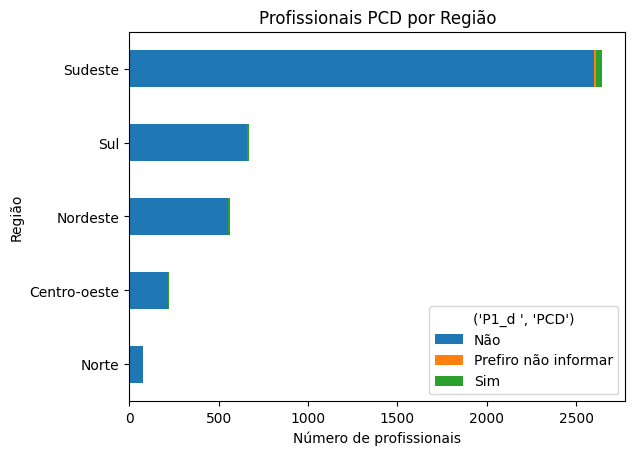

In [226]:
df_pcd = tipo_profissionais_por_regiao(df_parte_1, 'Profissionais PCD', "('P1_d ', 'PCD')", 'Não')

In [227]:
df_pcd.fillna(0,inplace=True)
display(df_pcd)
total_pcd  = df_pcd['Sim'].sum()
df_pcd_sim = pd.DataFrame(100 * df_pcd['Sim']/total_pcd).sort_values(by='Sim',ascending=False)
display(df_pcd_sim)

"('P1_d ', 'PCD')",Não,Prefiro não informar,Sim
"('P1_i_2 ', 'Regiao onde mora')",,,
Norte,74.0,2.0,0.0
Centro-oeste,217.0,2.0,3.0
Nordeste,551.0,3.0,8.0
Sul,658.0,2.0,9.0
Sudeste,2601.0,9.0,32.0


,Sim
"('P1_i_2 ', 'Regiao onde mora')",
Sudeste,61.538462
Sul,17.307692
Nordeste,15.384615
Centro-oeste,5.769231
Norte,0.000000


Pelo questionário são muito pouco profissionais PCD na área de dados no Brasil, sendo o Sudeste a região que apresenta a maior proporção desses profissionais, com ~61,5%.

# Profissionais por área de formação

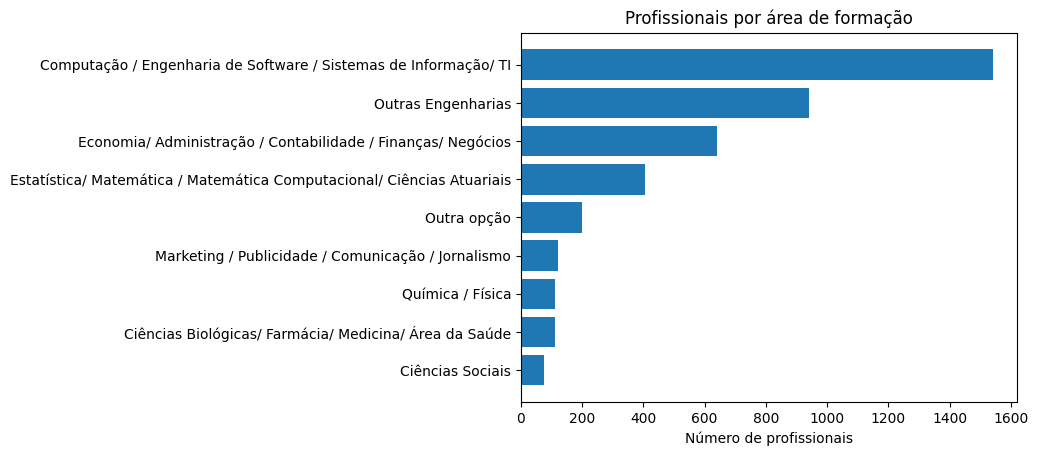

In [228]:
df_area_formacao       = df_parte_1.groupby("('P1_m ', 'Área de Formação')")["('P1_m ', 'Área de Formação')"].count().sort_values()
indexes_area_formacao  = df_area_formacao.index
values_area_formacao   = df_area_formacao.values

plt.barh(indexes_area_formacao, values_area_formacao)
plt.xlabel('Número de profissionais')
plt.title('Profissionais por área de formação');

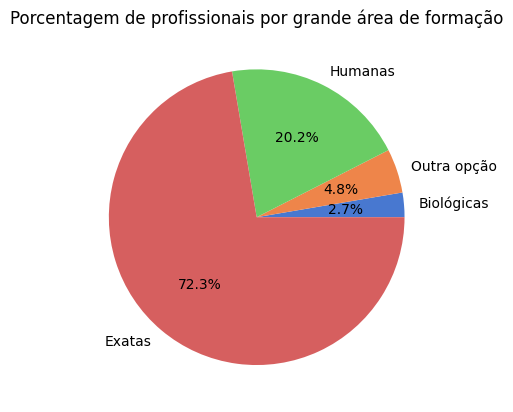

In [229]:
dict_areas = {
  'Ciências Sociais':                                                       'Humanas',
  'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde':                 'Biológicas',
  'Química / Física':                                                       'Exatas',
  'Marketing / Publicidade / Comunicação / Jornalismo':                     'Humanas',
  'Outra opção':                                                            'Outra opção',
  'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais': 'Exatas',
  'Economia/ Administração / Contabilidade / Finanças/ Negócios':           'Humanas',
  'Outras Engenharias':                                                     'Exatas',
  'Computação / Engenharia de Software / Sistemas de Informação/ TI':       'Exatas'
}

grandes_areas          = [dict_areas[x] for x in df_parte_1["('P1_m ', 'Área de Formação')"].to_list() if not pd.isna(x)]
df_grandes_areas       = pd.DataFrame(grandes_areas,columns=['Grande Área'])
df_grandes_areas_group = df_grandes_areas.groupby('Grande Área')['Grande Área'].count().sort_values()
df_grandes_areas_group = 100 * df_grandes_areas_group / df_grandes_areas_group.sum()
indexes_grandes_areas  = df_grandes_areas_group.index
values_grandes_areas   = df_grandes_areas_group.values

labels = df_grandes_areas_group.index
plt.pie(df_grandes_areas_group, labels = labels, autopct='%1.1f%%',colors=sns.color_palette('muted'))
plt.title('Porcentagem de profissionais por grande área de formação');

A maioria dos profissionais de dados se formaram em áreas relacionadas à computação e exatas. No entanto, é possível notar que vários profissionais formados em áreas relacionadas à humanas também têm atuado com dados, chegando a aproximadamente 20% dos respondentes do questionário.

# Parte 2 - Forma de trabalho e Remuneração

Text(0.5, 0, 'Frequência')

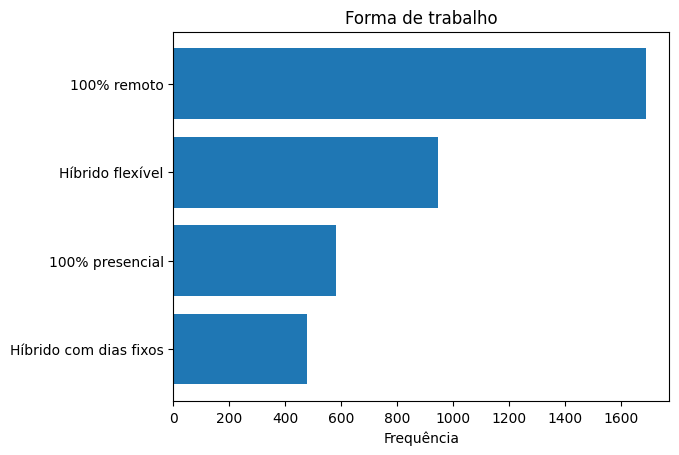

In [230]:
index = ['Híbrido com dias fixos', '100% presencial', 'Híbrido flexível', '100% remoto']
values = df_parte_2.groupby("('P2_p ', 'Atualmente qual a sua forma de trabalho?')")["('P2_p ', 'Atualmente qual a sua forma de trabalho?')"].count().sort_values(ascending=True).values

plt.barh(index, values)
plt.title('Forma de trabalho')
plt.xlabel('Frequência')


Adicionalmente, destaca-se a marcada predominância do trabalho remoto, tanto no formato completamente remoto quanto no modelo híbrido. No setor de Tecnologia da Informação, observa-se uma tendência crescente em relação ao trabalho remoto, impulsionada ainda mais pela influência da pandemia. Esta análise constata que a área de dados segue essa tendência, mantendo-se alinhada com as evoluções do setor.

Text(0.5, 1.0, 'Salário mensal em reais')

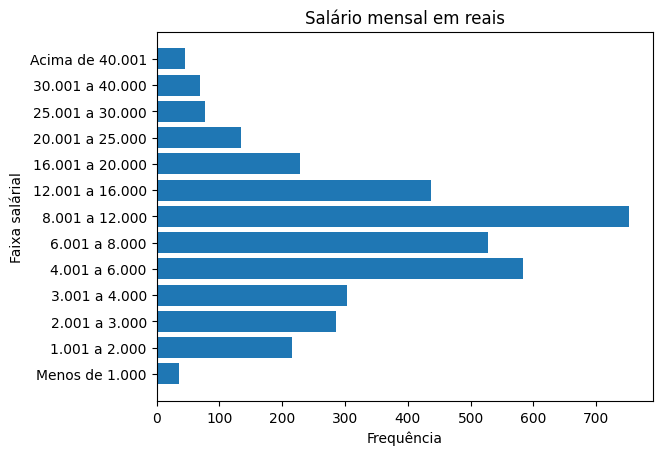

In [231]:
series_salarios = df_parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()
faixas_ordenadas = ['Menos de R$ 1.000/mês',
                    'de R$ 1.001/mês a R$ 2.000/mês',
                    'de R$ 2.001/mês a R$ 3.000/mês',
                    'de R$ 3.001/mês a R$ 4.000/mês',
                    'de R$ 4.001/mês a R$ 6.000/mês',
                    'de R$ 6.001/mês a R$ 8.000/mês',
                    'de R$ 8.001/mês a R$ 12.000/mês',
                    'de R$ 12.001/mês a R$ 16.000/mês',
                    'de R$ 16.001/mês a R$ 20.000/mês',
                    'de R$ 20.001/mês a R$ 25.000/mês',
                    'de R$ 25.001/mês a R$ 30.000/mês',
                    'de R$ 30.001/mês a R$ 40.000/mês',
                    'Acima de R$ 40.001/mês'
                    ]

labels = ['Menos de 1.000',
          '1.001 a 2.000',
          '2.001 a 3.000',
          '3.001 a 4.000',
          '4.001 a 6.000',
          '6.001 a 8.000',
          '8.001 a 12.000',
          '12.001 a 16.000',
          '16.001 a 20.000',
          '20.001 a 25.000',
          '25.001 a 30.000',
          '30.001 a 40.000',
          'Acima de 40.001']

series_salarios_reordenadas = series_salarios[faixas_ordenadas]
plt.barh(labels, series_salarios_reordenadas.values)
plt.xlabel('Frequência')
plt.ylabel('Faixa salárial')
plt.title('Salário mensal em reais')

Ao analisar o gráfico, percebemos que muitos profissionais na área têm salários mais altos do que a média no Brasil, que foi cerca de R$ 2.449 em 2021, de acordo com a Pnad. Isso sugere que os profissionais de dados estão sendo bem remunerados em comparação com outros setores. Isso pode ser devido à demanda por suas habilidades especializadas e à importância crescente dos dados em várias indústrias.

Depois de verificar o comportamento salarial geral dos profissionais de dados, iremos estratificar essa informação em diferentes categorias. São elas: Gênero, Etnia, PCD, cargo e tempo de trabalho. A pergunta que queremos responder é: a faixa salarial entre esses diferentes grupos é homogênea? Como estão distribuídas as faixas salariais entre esses grupos?

# Análise Salarial por Gênero
Como as faixas salarias são valores categóricos do tipo "object", as análises possíveis com esse tipo de dado estão relacionadas com contagem.

In [ ]:
df["('P2_h ', 'Faixa salarial')"].info() #Verificando que tipo de dado é a coluna faixa salarial.

In [ ]:
df_genero_salarios = df.filter(items=["('P1_b ', 'Genero')","('P2_h ', 'Faixa salarial')"]) # Primeiramente, para cada grupo de análise, fizemos um subset do dataframe original para obter a coluna específica do grupo de análise e a faixa salarial
df_genero_salarios.dropna()
df_genero_salarios["('P1_b ', 'Genero')"].value_counts() # Contando a quantidade de elementos de cada grupo

In [ ]:
# Realizando um looping para gerar gráficos para cada gênero

lista_genero = ['Feminino', 'Masculino']

for genero in lista_genero:
  df_genero_salarios_grouped = df_genero_salarios[df_genero_salarios["('P1_b ', 'Genero')"] == genero].groupby("('P2_h ', 'Faixa salarial')").count() # Agrupando por

  df_genero_salarios_grouped = df_genero_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_genero_salarios_grouped["('P1_b ', 'Genero')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal - Gênero {genero}')
  plt.show()

In [ ]:
# Criando uma matriz(dataframe 2d) para a criação do heatmap, facilitando assim a visualização dos resultados. 
genero_matrix = (df_genero_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_b ', 'Genero')"].value_counts().unstack().fillna(0))
df_hm_genero = pd.DataFrame(genero_matrix , index = faixas_ordenadas,
                  columns = ['Feminino','Masculino'])

In [ ]:
# Plotagem do heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_genero.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])

plt.title('nº de profissionais - Gênero x Faixa Salarial')
plt.xlabel('Gênero')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

In [ ]:
# Criando uma matriz com a porcentagem de cada grupo relacionado em cada faixa salarial.
genero_matrix_p = genero_matrix.copy()

genero_matrix_p['Feminino'] = genero_matrix_p['Feminino']*100/df_genero_salarios["('P1_b ', 'Genero')"].value_counts()['Feminino']
genero_matrix_p['Masculino'] = genero_matrix_p['Masculino']*100/df_genero_salarios["('P1_b ', 'Genero')"].value_counts()['Masculino']


df_hm_genero_p = pd.DataFrame(genero_matrix_p , index = faixas_ordenadas,
                  columns = ['Feminino','Masculino'])

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_genero_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels[::-1])


plt.title('% de profissionais - Gênero x Faixa Salarial')
plt.xlabel('Gênero')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

Observando o heatmap, é possível observar que no gênero feminino, dentre as 795 pessoas que responderam a pesquisa 182 (17,23%) ganham na faixa de R\$8001 - R\$12000. De forma similar, 17.69% das pessoas do gênero masculino (565 pessoas) ganham nesta mesma faixa, sendo ela a faixa de maior ocorrência entre os gêneros. É possível observar ainda, que na faixa de salários mais alta, existe uma maior predominânica de homens do que mulheres (42 x 3).

# Análise Salarial por Etnia/Cor/Raça
Como estão distribuídas as faixas salariais por etnia?

In [ ]:
# Separando subconjunto do df original e contanto os valores únicos de cada etnia.
df_etnia_salarios = df.filter(items=[ "('P1_c ', 'Cor/raca/etnia')","('P2_h ', 'Faixa salarial')"])
df_etnia_salarios.dropna()
df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"].value_counts() #contando os valores únicos

In [ ]:
# Realizando um looping para gerar gráficos para cada etnia
lista_etnias = ['Preta','Indígena','Parda','Amarela','Branca', 'Outra', 'Prefiro não informar']

for etnia in lista_etnias:
  df_etnia_salarios_grouped = df_etnia_salarios[df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"] == etnia].groupby("('P2_h ', 'Faixa salarial')").count()

  df_etnia_salarios_grouped = df_etnia_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal etnia ({etnia})')
  plt.show()


In [ ]:
# Criando uma matriz(dataframe 2d) para a criação do heatmap, facilitando assim a visualização dos resultados. 
etnia_matrix = (df_etnia_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_c ', 'Cor/raca/etnia')"].value_counts().unstack().fillna(0))
df_hm_etnia = pd.DataFrame(etnia_matrix, index = faixas_ordenadas,
                  columns = lista_etnias)

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_etnia.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f',yticklabels = labels[::-1])

plt.title('nº de profissionais -  Cor/Etnia/Raça X Faixa salarial')
plt.xlabel('Cor/Etnia/Raça')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

In [ ]:
# Criação de matriz com porcentagem de cada grupo por faixa salarial
etnia_matrix_p = etnia_matrix.copy()

for etnia in lista_etnias:

  etnia_matrix_p[etnia] = etnia_matrix_p[etnia]*100/df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"].value_counts()[etnia]

df_hm_etnia_p = pd.DataFrame(etnia_matrix_p , index = faixas_ordenadas,
                  columns = lista_etnias)

In [ ]:
# Criando uma matriz(dataframe 2d) para a criação do heatmap, facilitando assim a visualização dos resultados. 
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_etnia_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels[::-1])

plt.title('% de profissionais - Etnia x Faixa Salarial')
plt.xlabel('Etnia')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

A partir dos gráficos é possível perceber que o grupo com maior quantidade de profissionais é o de etnia/cor/raça Branca. E a maior parte desse grupo (18,15%) ganha entre R\$ 8001 - R\$12000. É possível perceber também que, dentre todas as categorias informadas, essa é a faixa predomintante, exceto para a etnia/cor/raça Preta que tem 17.18% de seus profissionais, ganhando na faixa de R\$ 4001 - R\$6000. 

# Análise Salarial de PCD
Observando a distribuição salarial na população PCD

In [ ]:
# Realizando um filtro do dataframe apenas com as colunas de genero e faixa salarial
df_pcd_salarios = df.filter(items=["('P1_d ', 'PCD')","('P2_h ', 'Faixa salarial')"])
df_pcd_salarios.dropna()
df_pcd_salarios["('P1_d ', 'PCD')"].value_counts()

In [ ]:
# Plotando gráfico da faixa salarial x numero de profissionais
df_pcd_salarios_grouped = df_pcd_salarios[df_pcd_salarios["('P1_d ', 'PCD')"] == 'Sim'].groupby("('P2_h ', 'Faixa salarial')").count()

df_pcd_salarios_grouped = df_pcd_salarios_grouped.reindex(faixas_ordenadas).fillna(0)


plt.barh(labels, df_pcd_salarios_grouped["('P1_d ', 'PCD')"][faixas_ordenadas])
plt.xlabel('Número de profissionais')
plt.ylabel('Faixa salárial (R$)')
plt.title(f'Salário mensal - PCD')
plt.show()

Assim como nas outras análises, a faixa salarial predominante para o grupo PCD é a de R\$ 8001 - R\$12000. Só um profissional ganha acima de R\$40000 e também, só um ganha abaixo de R\$1000.

# Análise Salarial por Cargo Ocupado
Como estão distribuidos os salários por cargo?

In [ ]:
# Criando um subset do dataframe original para o cargo ocupado x faixa salarial
df_cargos_salarios = df.filter(items=["('P2_f ', 'Cargo Atual')","('P2_h ', 'Faixa salarial')"])
df_cargos_salarios.dropna()
df_cargos_salarios["('P2_f ', 'Cargo Atual')"].value_counts()

In [ ]:
# Criando manualmente uma lista de cargos
lista_cargos = ['DBA/Administrador de Banco de Dados', 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Analista de Dados/Data Analyst',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Outra Opção', 'Analista de Suporte/Analista Técnico',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Estatístico', 'Economista']
lista_cargos.sort()

In [ ]:
# Plotando gráifcos 
plt.barh(lista_cargos,df_cargos_salarios["('P2_f ', 'Cargo Atual')"].value_counts()[lista_cargos])
plt.xlabel('Número de profissionais')
plt.ylabel('Cargo')
plt.title(f'Número de profissionais em relação ao cargo')
plt.show()

In [ ]:
# Realizando um looping para gerar gráficos para cada cargo
for cargo in lista_cargos:
  df_cargos_salarios_grouped = df_cargos_salarios[df_cargos_salarios["('P2_f ', 'Cargo Atual')"] == cargo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_cargos_salarios_grouped = df_cargos_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_cargos_salarios_grouped["('P2_f ', 'Cargo Atual')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial')
  plt.title(f'Salário mensal em R$ - {cargo}')
  plt.show()

In [ ]:
# Criando uma matriz(dataframe 2d) para a criação do heatmap, facilitando assim a visualização dos resultados. 
cargos_matrix = (df_cargos_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_f ', 'Cargo Atual')"].value_counts().unstack().fillna(0))
df_hm_cargos = pd.DataFrame(cargos_matrix, index = faixas_ordenadas,
                  columns = lista_cargos)

In [ ]:
# Plotando heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_cargos.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])


plt.title('nº de profissionais - Cargo x Faixa Salarial')
plt.xlabel('Cargos Ocupados')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

In [ ]:
# Criando uma matriz(dataframe 2d) com valores percentuais por cargos para, facilitando assim a visualização dos resultados. 
cargos_matrix_p = cargos_matrix.copy()

for cargo in lista_cargos:

  cargos_matrix_p[cargo] = cargos_matrix_p[cargo]*100/df_cargos_salarios["('P2_f ', 'Cargo Atual')"].value_counts()[cargo]

df_hm_cargos_p = pd.DataFrame(cargos_matrix_p , index = faixas_ordenadas,
                  columns = lista_cargos)

In [ ]:
# Plotando heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_cargos_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels[::-1])

plt.title('% de profissionais - Cargo x Faixa Salarial')
plt.xlabel('Cargo')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

É interessante observar que dentre os diversos cargos, a faixa predominante de salário é entre R\$8001 - R\$12000. Entretanto, alguns cargos fogem de padrão como por exemplo o analista de marketing - em que 42% do profissionais ganham entre R\$4001 - R\$6000, assim como o analista BI (24,60%), Analista de dados(25,04%) e o Analista de inteligência de mercado(24.14%). A carreira que possui a maioria dos seus profissionais recebendo a menor faixa salarial é a de Analista de Suporte/Analista técnico (30,56% - recebendo entre R\$2001 - R\$3000). Já o grupo que possuem predominantemente a maior faixa salarial é Product Manager/Product Owner (29,41% - recebendo entre R\$12001 - R\$16000).

# Análise Salarial por Tempo de Carreira
Como estão distribuídas as faixas salarias em relação ao tempo de carreira?

In [ ]:
# Separando dataframe apenas com as colunas de tempo de carreira e faixa salarial
df_tempo_carreira_salarios = df.filter(items=["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_h ', 'Faixa salarial')"])
df_tempo_carreira_salarios.dropna()
df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts()

In [ ]:
# Criando lista com tempo de carreira na ordem desejada
lista_tempo_carreira = ['Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos', 'de 7 a 10 anos',
       'Mais de 10 anos']

In [ ]:
# Plotando gráficos de barras com contagem de cada faixa salarial para cada carreira
for tempo in lista_tempo_carreira:
  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios[df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] == tempo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_tempo_carreira_salarios_grouped["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal por tempo de carreira - {tempo}')
  plt.show()

In [ ]:
# Criando uma matriz(dataframe 2d) para a criação do heatmap, facilitando assim a visualização dos resultados. 
tempo_matrix = (df_tempo_carreira_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().unstack().fillna(0))
df_hm_tempo = pd.DataFrame(tempo_matrix, index = faixas_ordenadas,
                  columns = lista_tempo_carreira)

In [ ]:
# Plotando heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_tempo.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])

plt.title('nº de profissionais - Tempo de Carreira x Faixa Salarial')
plt.xlabel('Tempo de carreira')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

In [ ]:
# Criando uma matriz(dataframe 2d) com valores percentuais por tempo de carreira, facilitando assim a visualização dos resultados. 
tempo_matrix_p = tempo_matrix.copy()

for tempo in lista_tempo_carreira :

  tempo_matrix_p[tempo] = tempo_matrix_p[tempo]*100/df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts()[tempo]

df_hm_tempo_p = pd.DataFrame(tempo_matrix_p , index = faixas_ordenadas,
                  columns = lista_tempo_carreira)

In [ ]:
# Plotando heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_tempo.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])

plt.title('nº de profissionais - Tempo de Carreira x Faixa Salarial')
plt.xlabel('Tempo de carreira')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

A partir destes gráficos, é possível notar uma tendência de aumento de faixa salarial relacionado com um maior tempo de carreira. é possível observar um deslocamento vertical do valor mais comum para faixas de salários mais altas quando o tempo de carreira cresce. Carreiras mais longas possuem uma porcentagem maior de profissionais nas faixas mais altas de salários. Possível observar também que, dentre as pessoas que responderam o questionário, a maioria delas (980) tem menos de 1 ano de carreira e sua maioria ganha entre R\$4001 e R\$ 6000.

In [232]:
pd.set_option('display.max_columns', None)

def extract_text_between_quotes(string):
    pattern = r"'(.*?)'"
    matches = re.findall(pattern, string)
    return matches

In [233]:
parte_4 = df_parte_4.copy()

for i in parte_4.columns:
    parte_4.rename(columns={i:extract_text_between_quotes(i)[0]},inplace=True)

# Análise Técnica 
###  - Quais são as funções mais ocupadas na carreira de dados? 
### - Qual Stack mais utilizada no mercado de dados?
###  - O que um cientista de dados faz?

O mercado de dados é muito diverso, apresentando uma ampla gama de atuações, onde todas, são essenciais.

Nesta análise, vamos entender um pouco sobre como estas são destribuídas e o que esperar do trabalho como cientista de dados.

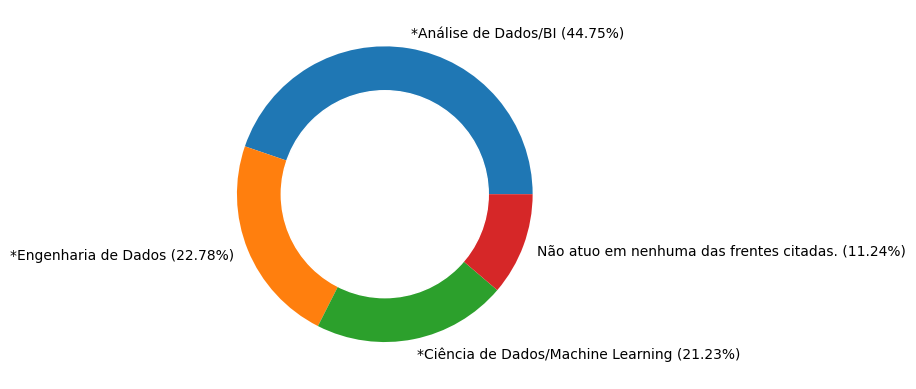

In [234]:
#Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
df_P4_a = parte_4.filter(like='P4_a ',axis=1).copy()
df_P4_a['contador'] = 1
df_P4_a['P4_a '] = df_P4_a['P4_a '].str.split(':',expand=True)[0]

df_P4_a = df_P4_a.groupby('P4_a ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

df_P4_a['percentual'] = (df_P4_a['contador'] / df_P4_a['contador'].sum()) * 100

#Paliativo para os labels

df_P4_a['label'] = df_P4_a['P4_a '] + ' (' +  df_P4_a['percentual'].round(2).astype('str') + '%' + ')'


#Donut Chart
plt_centro = plt.Circle((0,0), 0.7,color='white')
plt.pie(df_P4_a['percentual'],labels=df_P4_a['label'])
p = plt.gcf()
p.gca().add_artist(plt_centro)

plt.show()



Daqueles que responderam a pesquisa, percebemos que maior parte trabalha com análise de dados ou BI, e a minoria, trabalha com ciência de dados *per se*.

Não desanime! Essa relação é facilmente explicável com a piramide de prioridades de dados:

![hierarchy of needs](https://hackernoon.imgix.net/hn-images/1*7IMev5xslc9FLxr9hHhpFw.png)

Analistas de dados/BI trazem muito valor com análises relativamente menos complexas. O trabalho do cientista de dados requer empresas com maior maturidade de dados. 

### Agora, qual stack os profissionáis de dados mais usam no seu dia a dia?

[Text(0, 0, '1245'),
 Text(0, 0, '1136'),
 Text(0, 0, '325'),
 Text(0, 0, '113'),
 Text(0, 0, '56'),
 Text(0, 0, '26'),
 Text(0, 0, '22'),
 Text(0, 0, '19'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

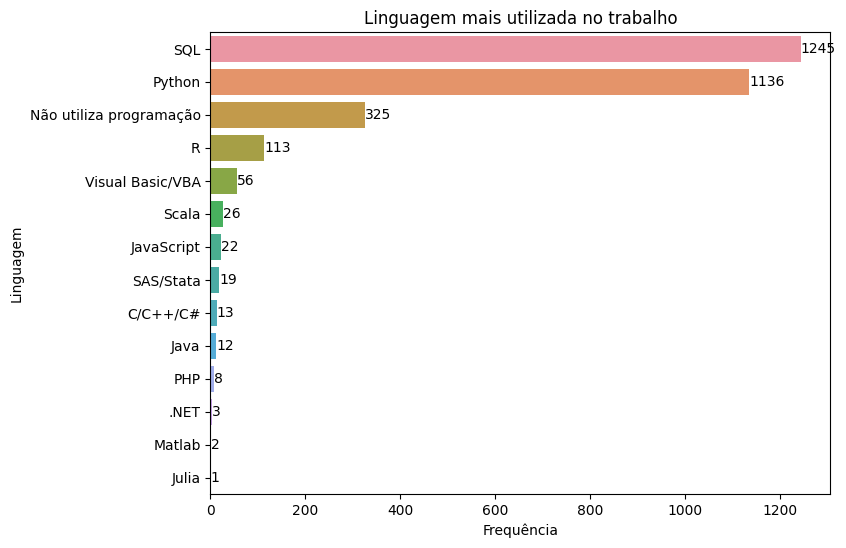

In [235]:
#Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?
df_P4_e = parte_4.filter(like='P4_e ',axis=1).copy() #Pega somente a coluna de nome 'P4_e'
df_P4_e.loc[:,'contador'] = 1 #Define uma nova coluna somente o número 1 

#Agrupamento para gerar o ranking das linguagens mais utilizadas
df_P4_e = df_P4_e.groupby('P4_e ',as_index=False).agg({'contador':'sum'}).sort_values(by='contador',ascending=False)

#Gráfico de barra com o ranking por linguagem
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(df_P4_e,y='P4_e ',x='contador')
plt.title('Linguagem mais utilizada no trabalho')
plt.xlabel('Frequência')
plt.ylabel('Linguagem')

ax.bar_label(ax.containers[0])

No geral, a linguagem **mais** utilizada pelas pessoas que trabalham no mercado de dados são: **SQL** e **Python**, surpreendentemente, 325 pessoas responderam que **não utilizam nenhuma linguagem**.

E como esse comportamendo se reflete nas profissões?

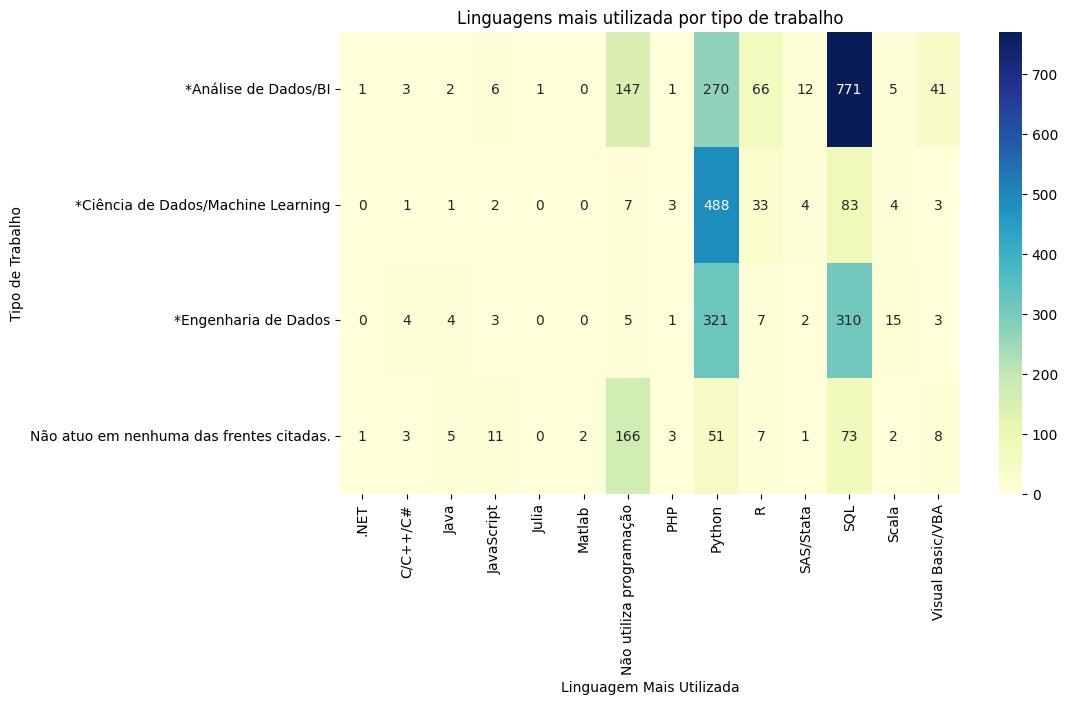

In [236]:
df_P4_e_pivot = parte_4[['P4_a ','P4_e ']]
df_P4_e_pivot = df_P4_e_pivot.dropna()
df_P4_e_pivot['P4_a '] = parte_4['P4_a '].str.split(':',expand=True)[0]
df_P4_e_pivot = df_P4_e_pivot.pivot_table(index='P4_a ',columns='P4_e ',aggfunc='size', fill_value=0)
df_P4_e_pivot

plt.figure(figsize=(10, 6))
sns.heatmap(df_P4_e_pivot, cmap='YlGnBu', annot=True, fmt='d')  # cmap define a paleta de cores
plt.title('Linguagens mais utilizada por tipo de trabalho')
plt.xlabel('Linguagem Mais Utilizada')
plt.ylabel('Tipo de Trabalho')
plt.show()

In [237]:
df_P4_e_pivot.sum(axis=1)

P4_a 
*Análise de Dados/BI                        1326
*Ciência de Dados/Machine Learning           629
*Engenharia de Dados                         675
Não atuo em nenhuma das frentes citadas.     333
dtype: int64

No caso dos analistas de dados, a linguaguem mais utilizada é **SQL**, representando **58%** daqueles que responderam.

Cienistas e engenheiros de dados relataram que a linguagem que mais utilizam é **Python**, representando respectivamente **77%** e **48%** dos entrevistados dessas profissões.

Nota-se que a pergunta respondida anteriormente foi: qual a linguagem você **mais** usa. Abaixo, temos um gráfico acumulado que representa quais são as linguagens utilizadas no dia a dia por profissão. Ou seja, o entrevistado poderia responder todas as linguagens que costuma utlizar, e não apenas uma. 

In [238]:
lista_colunas = list(df.filter(like = 'P4_d', axis = 1).copy().columns) 
lista_colunas.append("('P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')")

df_P4_d = df[lista_colunas].copy()

for i in df_P4_d.columns:
    df_P4_d.rename(columns={i:extract_text_between_quotes(i)[1]},inplace=True)


df_P4_d = df_P4_d.drop(columns=['Quais das linguagens listadas abaixo você utiliza no trabalho?'])
df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
] = df_P4_d['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
].str.split(':',expand=True)[0]
df_P4_d = df_P4_d.dropna()

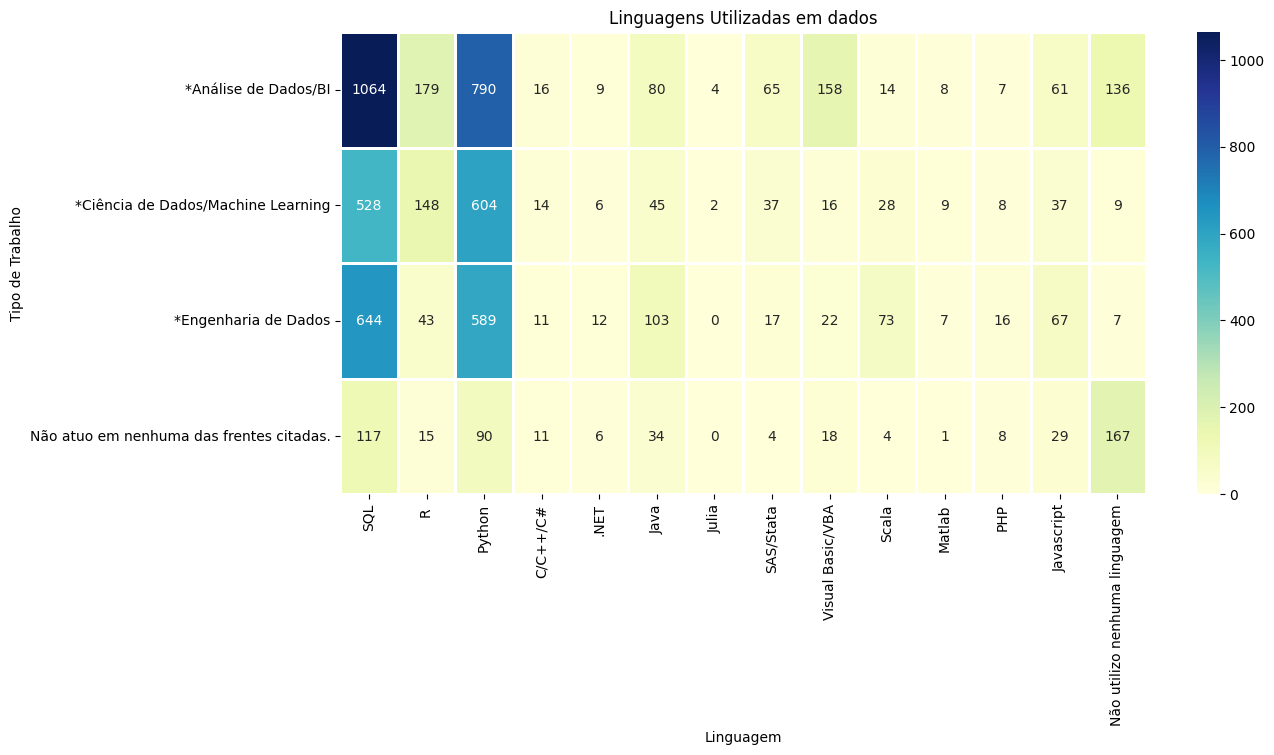

In [239]:


df_P4_d_pivot = df_P4_d.groupby('Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
).sum()


plt.figure(figsize=(13, 6))
heatmap = sns.heatmap(df_P4_d_pivot, cmap='YlGnBu', annot=True,linewidths=2,fmt='.0f')  # cmap define a paleta de cores

plt.title('Linguagens Utilizadas em dados')
plt.xlabel('Linguagem')
plt.ylabel('Tipo de Trabalho')
plt.show()

### Qual a função de um cientista de dados? 

Em varias ocasiões, os cientistas de dados terão que atacar diversas frentes de um projeto, nem todas as empresas possuem estruturas consolidadas e requerem que o cientista trabalhe desde o ETL, ao EDA, criação do algoritimo e produtização.

No gráfico abaixo, vemos de forma generalizada o que entrevistados responderam que costumam fazer no seu dia a dia:

- Algoritimos de ML : Desenvolver os algorimos, criar experimentos, testar hipóteses e realizar predições. Ter contato com a área de negócios e gerar os artefatos que serão implementados.

- Produtização de modelos: Coletar os artefatos gerados e colocá-los em produção, servindos os modelos através de apis, cuidando de pipelines CI/CD e envolvimento com a cultura de MLOPs

- Limpeza e ETL: Responsável por tratar os dados utlizados na modelagem, pode ter envolvimento com DAGs e pipelines de dados

- Visualização e BI: Construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.


	> Essa pergunta segue o mesmo modelo da anterior onde o entrevistado pode responde mais de uma função.

[Text(0, 0, '1477'), Text(0, 0, '503'), Text(0, 0, '340'), Text(0, 0, '178')]

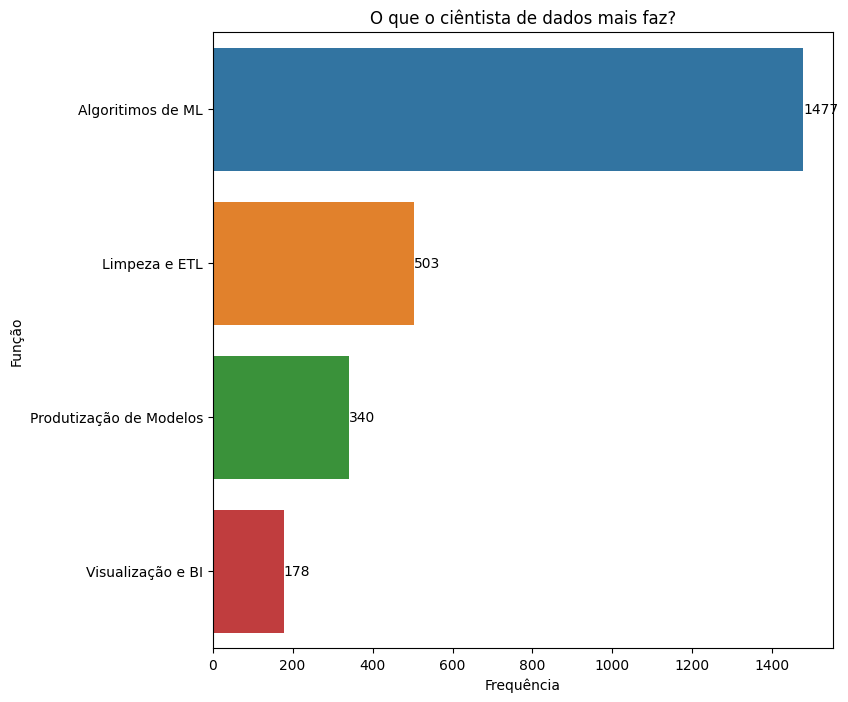

In [240]:
parte_8 = df_parte_8.copy()

df_P8_a = parte_8.filter(like='P8_a_',axis=1).copy()

mascara_nomes_colunas = {col: extract_text_between_quotes(col)[1] for col in df_P8_a.columns}
df_P8_a.rename(columns=mascara_nomes_colunas, inplace=True)


df_P8_a_rename_dict = {'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.':'Algoritimos de ML',
'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.':'Limpeza e ETL',
'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.':'Algoritimos de ML',
'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).':'Algoritimos de ML',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário':'Algoritimos de ML',
'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc':'Visualização e BI',
'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Algoritimos de ML',
'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.':'Limpeza e ETL',
'Crio e gerencio soluções de Feature Store e cultura de MLOps.':'Produtização de Modelos',
'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)':'Produtização de Modelos',
'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.':'Produtização de Modelos',
'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.':'Algoritimos de ML'}

df_P8_a = df_P8_a.rename(columns=df_P8_a_rename_dict)

df_P8_a = df_P8_a.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_a = df_P8_a.reset_index()
df_P8_a.columns = ['Desc', 'Soma']
df_P8_a = df_P8_a.sort_values('Soma',ascending=False)

df_P8_a_top = df_P8_a.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_a_top


#Gráfico de barra
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(df_P8_a_top,y='Desc',x='Soma')
plt.title('O que o ciêntista de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')
ax.bar_label(ax.containers[0])


### Quais técnicas mais utilizadas em ciência de dados?

Em alguns momentos podemos nos deixar levar pela idealização excessiva da profissão. Qual, de fato, são as técnicas mais usadas em ciência de dados?

[Text(0, 0, '572'),
 Text(0, 0, '471'),
 Text(0, 0, '391'),
 Text(0, 0, '334'),
 Text(0, 0, '267'),
 Text(0, 0, '172'),
 Text(0, 0, '136'),
 Text(0, 0, '125'),
 Text(0, 0, '88'),
 Text(0, 0, '76'),
 Text(0, 0, '36')]

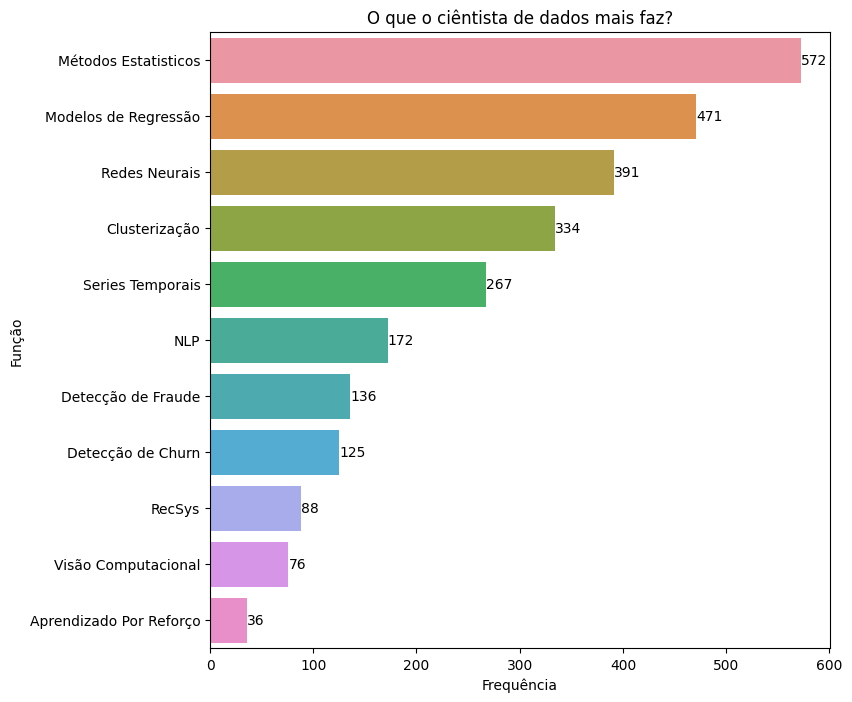

In [241]:
df_P8_b = parte_8.filter(like='P8_b_',axis=1).copy()

mascara_nomes_colunas_b = {col: extract_text_between_quotes(col)[1] for col in df_P8_b.columns}
df_P8_b.rename(columns=mascara_nomes_colunas_b, inplace=True)

df_P8_b_rename_dict = {'Utilizo modelos de regressão (linear, logística, GLM)':'Modelos de Regressão',
'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação':'Redes Neurais',
'Desenvolvo sistemas de recomendação (RecSys)':'RecSys',
'Utilizo métodos estatísticos Bayesianos para analisar dados':'Métodos Estatisticos',
'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados':'NLP',
'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados':'Métodos Estatisticos',
'Utilizo cadeias de Markov ou HMM':'Métodos Estatisticos',
'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)':'Clusterização',
'Realizo previsões através de modelos de Séries Temporais (Time Series)':'Series Temporais',
'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)':'Aprendizado Por Reforço',
'Utilizo modelos de Machine Learning para detecção de fraude':'Detecção de Fraude',
'Utilizo métodos de Visão Computacional':'Visão Computacional',
'Utilizo modelos de Detecção de Churn':'Detecção de Churn'}

df_P8_b = df_P8_b.rename(columns=df_P8_b_rename_dict)

df_P8_b = df_P8_b.transpose().apply(lambda col: col.sum(), axis=1)

df_P8_b = df_P8_b.reset_index()
df_P8_b.columns = ['Desc', 'Soma']
df_P8_b = df_P8_b.sort_values('Soma',ascending=False)

df_P8_b_top = df_P8_b.groupby('Desc',as_index=False).sum().sort_values('Soma',ascending=False)

df_P8_b_top

#Gráfico de barra
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(df_P8_b_top,y='Desc',x='Soma')
plt.title('O que o ciêntista de dados mais faz?')
plt.xlabel('Frequência')
plt.ylabel('Função')
ax.bar_label(ax.containers[0])




Métodos estatisticas lideram o ranking conforme o esperado. Como citado anteriormente, técnicas mais complexas exigem ambientes de dados mais maduros.
